# Simple Decision Tree Example

**Exercise 1:** Compare the performance of the decision tree between the training and testing sets. (Cell 3)
- What do you notice?
- Why do you think that happens?

**Exercise 2:** Play around with the settings of the DecisionTreeClassifier and see how its performance changes. (Cell 2)
- Compare the performance of your new decision tree between the training and testing sets
- What can we do to make the model more accurate on the test set?

Settings for DecisionTreeClassifier can be found here: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Import data and prep for modeling

In [1]:
# Import statements
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from IPython.display import Image #This is new. We need this to show the visual decision tree in the iPython Notebook
import subprocess
pd.set_option('mode.chained_assignment', None) #Setting this to turn off the annoying 'SettingWithCopy' warnings

# Import data
titanic_train = pd.read_csv('titanic_train.csv', index_col='PassengerId')
titanic_test = pd.read_csv('titanic_test.csv', index_col='PassengerId')

# Split training data into feature columns and a target column
target_name = 'Survived'
feature_names = titanic_train.columns[titanic_train.columns!=target_name]
titanic_train_target = titanic_train[target_name].values
titanic_train_features = titanic_train[feature_names].values

## Set up and fit model

In [2]:
clf = tree.DecisionTreeClassifier(max_depth=4) #Default values

# Settings for DecisionTreeClassifier: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Play around with: max_depth, min_samples_split

clf.fit(titanic_train_features, titanic_train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Train / test performance

In [3]:
# Develop model predictions on training set
train_predicted = clf.predict(titanic_train_features)

# Print model performance
print 'Model performance on training data:'
print ''
print 'Model accuracy: ' + str(accuracy_score(titanic_train_target, train_predicted))
print ''
print 'Classification report:'
print classification_report(titanic_train_target, train_predicted)

# Set up testing set for modeling and predict test set outcomes
titanic_test_target = titanic_test[target_name].values
titanic_test_features = titanic_test[feature_names].values
test_predicted = clf.predict(titanic_test_features)
print ''
print ''
print ''
print ''

# Print model performance
print 'Model performance on test data:'
print ''
print 'Model accuracy: ' + str(accuracy_score(titanic_test_target, test_predicted))
print ''
print 'Classification report:'
print classification_report(titanic_test_target, test_predicted)

Model performance on training data:

Model accuracy: 0.84430176565

Classification report:
             precision    recall  f1-score   support

          0       0.84      0.92      0.88       387
          1       0.85      0.72      0.78       236

avg / total       0.84      0.84      0.84       623





Model performance on test data:

Model accuracy: 0.824626865672

Classification report:
             precision    recall  f1-score   support

          0       0.81      0.92      0.86       162
          1       0.85      0.68      0.75       106

avg / total       0.83      0.82      0.82       268



## ** Display Decision Tree

The way the code below works is a bit new. Unfortunately Sklearn doesn't make it easy to show a decision tree. Feel free to ask after class to go over the details.

If this code doesn't work on your computer, just comment this section out and skip it for now. It's not really needed for this exercise and we'll get you set up after class.

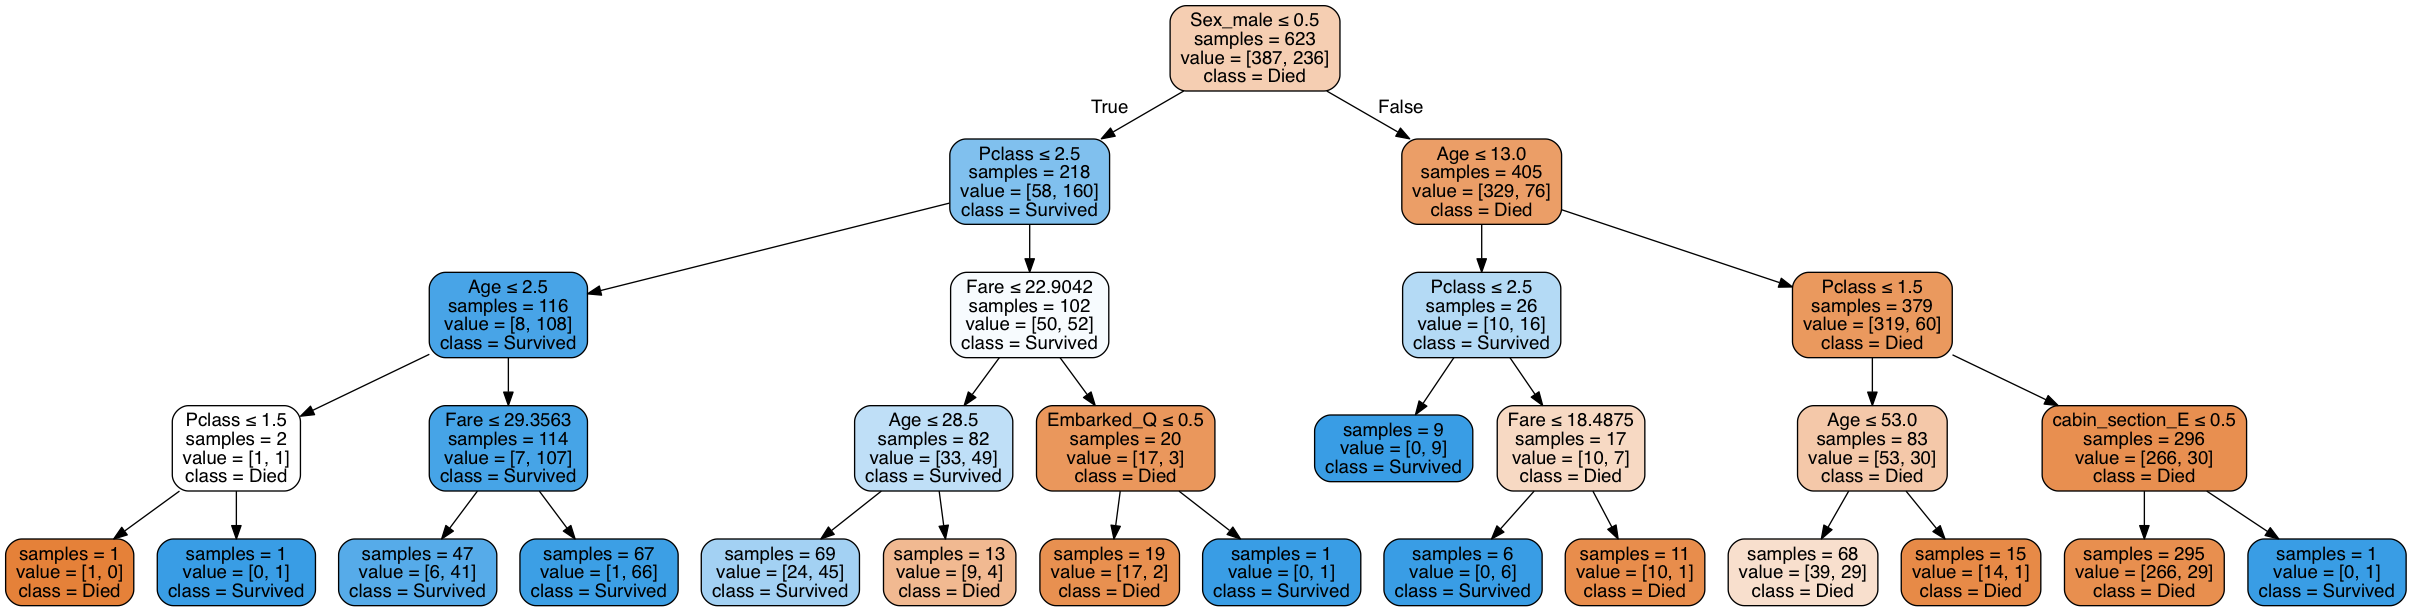

In [4]:
# REQUIREMENTS:
# pip install pydotplus
# brew install graphviz
import pydotplus
# Create a graphviz file of the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image

dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data, 
                     feature_names=feature_names,
                     class_names=['Died', 'Survived'],
                     filled=True, rounded=True, proportion=False,
                     impurity=False,
                     special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())